In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import pickle
from sklearn.model_selection import GridSearchCV
import warnings

In [28]:
df=pd.read_csv(r"./M1_final.csv")
#reading

In [3]:
df.shape
#shape check

(28820, 23)

In [29]:
import ppscore as pps
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [30]:
print(df.isnull().values.any())
df.isnull().sum()
#null check

True


MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [32]:
df["Wind"]=df['Wind'].replace(np.nan,"CALM")
df["Wind"].unique()
df=df.drop(['Condition','TAIL_NUM'],axis=1)
df['Dew Point']=df['Dew Point'].astype(int)
#null replace

In [13]:
pd.set_option('display.max_colwidth', None)
df.describe()

MONTH  DAY_OF_MONTH   DAY_OF_WEEK     DEP_DELAY  \
count  28820.000000  28820.000000  28820.000000  28820.000000   
mean       7.894240     16.021096      4.008952      6.374983   
std        4.991723      8.750179      1.985230     38.735144   
min        1.000000      1.000000      1.000000    -22.000000   
25%        1.000000      8.000000      2.000000     -6.000000   
50%       11.000000     16.000000      4.000000     -3.000000   
75%       12.000000     24.000000      6.000000      2.000000   
max       12.000000     31.000000      7.000000   1276.000000   

       CRS_ELAPSED_TIME      DISTANCE     CRS_DEP_M    DEP_TIME_M  \
count      28820.000000  28820.000000  28820.000000  28820.000000   
mean         225.288203   1267.746079    831.003851    828.934698   
std          119.482417    889.343246    299.398525    305.864103   
min           57.000000     94.000000    301.000000      1.000000   
25%          124.000000    483.000000    545.000000    542.000000   
50%          188.000000   1029.000000    856.000000    854.000000   
75%          365.000000   2248.000000   1095.000000   1097.000000   
max          697.000000   4983.000000   1439.000000   1440.000000   

          CRS_ARR_M   Temperature     Dew Point      Humidity    Wind Speed  \
count  28820.000000  28820.000000  28820.000000  28820.000000  28820.000000   
mean     910.874289     41.489833     30.420819     57.732616     12.367627   
std      345.411743      8.043533     12.314083     23.468676      6.259298   
min        1.000000     17.000000     -3.000000      0.000000      0.000000   
25%      667.000000     36.000000     23.000000     46.000000      8.000000   
50%      918.000000     42.000000     31.000000     59.000000     12.000000   
75%     1193.000000     47.000000     39.000000     74.000000     16.000000   
max     1439.000000     68.000000     67.000000     97.000000     36.000000   

          Wind Gust      Pressure       sch_dep       sch_arr      TAXI_OUT  
count  28820.000000  28820.000000  28820.000000  28820.000000  28820.000000  
mean       5.535323     30.092433     31.091256     28.432130     20.858570  
std       11.886457      0.296160      9.510359      8.263043      6.851915  
min        0.000000     29.200000      0.000000      0.000000      5.000000  
25%        0.000000     29.880000     26.000000     21.000000     16.000000  
50%        0.000000     30.110000     30.000000     30.000000     19.000000  
75%        0.000000     30.320000     37.000000     35.000000     25.000000  
max       49.000000     30.750000     55.000000     46.000000     41.000000

In [250]:
#Map y cloumn if required.

In [33]:
#Assigning Variables
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(y.shape)
x.shape

(28820,)


(28820, 20)

In [57]:
x.dtypes

MONTH                  int64
DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
OP_UNIQUE_CARRIER     object
DEST                  object
DEP_DELAY              int64
CRS_ELAPSED_TIME       int64
DISTANCE               int64
CRS_DEP_M              int64
DEP_TIME_M             int64
CRS_ARR_M              int64
Temperature            int64
Dew Point              int64
Humidity               int64
Wind                  object
Wind Speed             int64
Wind Gust              int64
Pressure             float64
Condition             object
sch_dep                int64
sch_arr                int64
dtype: object

In [34]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.1)
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=(0.1/0.9))
print(x_train.shape,x_test.shape,x_val.shape)

(23056, 20) (2882, 20) (2882, 20)


In [35]:
#num_basis addition
category_list=['OP_UNIQUE_CARRIER','DEST','Wind']
cat_var=[]

In [14]:
##NN and ridge regression(feature selection) SVR, bayesian.

In [226]:
from sklearn.preprocessing import OneHotEncoder
#Converting to onehot encoding.
x2_train=x_train.sort_index().reset_index(drop=True)
x2_test=x_test.sort_index().reset_index(drop=True)
x2_val=x_val.sort_index().reset_index(drop=True)
for s in category_list:
    #print(x2_train.shape,x2_val.shape,x2_test.shape)
    enc = OneHotEncoder(handle_unknown = 'ignore')
    #print(x2_train[s].values.reshape(-1, 1))
    enc.fit(x2_train[s].values.reshape(-1, 1))
    print(enc.categories_,len(enc.categories_[0]))
    #print(x2_train)
    #print(pd.DataFrame(enc.transform(x2_train[s].values.reshape(-1, 1)).toarray(),columns=[str(s)+'_'+str(i) for i in range(0,len(enc.categories_[0]))]))
    x2_train=pd.concat([x2_train,pd.DataFrame(enc.transform(x2_train[s].values.reshape(-1, 1)).toarray(),columns=[str(s)+'_'+str(i) for i in range(0,len(enc.categories_[0]))])],axis=1)
    #print(x2_train)
    x2_val=pd.concat([x2_val,pd.DataFrame(enc.transform(x2_val[s].values.reshape(-1, 1)).toarray(),columns=[str(s)+'_'+str(i) for i in range(0,len(enc.categories_[0]))])],axis=1)
    x2_test=pd.concat([x2_test,pd.DataFrame(enc.transform(x2_test[s].values.reshape(-1, 1)).toarray(),columns=[str(s)+'_'+str(i) for i in range(0,len(enc.categories_[0]))])],axis=1)
    x2_train=x2_train.drop(s,axis=1)
    x2_val=x2_val.drop(s,axis=1)
    x2_test=x2_test.drop(s,axis=1)
    #print(x2_train.shape,x2_val.shape,x2_test.shape)
print(x2_train.shape,x2_val.shape,x2_test.shape)
x2_train.head()

[array(['9E', 'AA', 'AS', 'B6', 'DL', 'HA', 'MQ', 'OO', 'YX'], dtype=object)] 9
[array(['ABQ', 'ATL', 'AUS', 'BNA', 'BOS', 'BQN', 'BTV', 'BUF', 'BUR',
       'BWI', 'CHS', 'CLE', 'CLT', 'CMH', 'CVG', 'DCA', 'DEN', 'DFW',
       'DTW', 'EGE', 'FLL', 'HNL', 'IAD', 'IAH', 'IND', 'JAC', 'JAX',
       'LAS', 'LAX', 'LGB', 'MCO', 'MIA', 'MSP', 'MSY', 'OAK', 'ONT',
       'ORD', 'ORF', 'ORH', 'PBI', 'PDX', 'PHL', 'PHX', 'PIT', 'PSE',
       'PSP', 'PWM', 'RDU', 'RIC', 'RNO', 'ROC', 'RSW', 'SAN', 'SAT',
       'SAV', 'SEA', 'SFO', 'SJC', 'SJU', 'SLC', 'SMF', 'SRQ', 'STT',
       'SYR', 'TPA'], dtype=object)] 65
[array(['CALM', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S',
       'SE', 'SSE', 'SSW', 'SW', 'VAR', 'W', 'WNW', 'WSW'], dtype=object)] 18
[array(['Cloudy', 'Cloudy / Windy', 'Drizzle and Fog', 'Fair',
       'Fair / Windy', 'Fog', 'Fog / Windy', 'Heavy Rain',
       'Heavy Rain / Windy', 'Light Drizzle', 'Light Drizzle / Windy',
       'Light Freezing Rain', 'Light Rain', 'Li

MONTH  DAY_OF_MONTH  DAY_OF_WEEK  DEP_DELAY  CRS_ELAPSED_TIME  DISTANCE  \
0     12             8            7         -4               173       765   
1      1             3            5         -2               144       541   
2     12            23            1        202                92       301   
3      1            26            7          5               194      1069   
4      1            15            3          0               427      2586   

   CRS_DEP_M  DEP_TIME_M  CRS_ARR_M  Temperature  ...  Condition_15  \
0        517         513        630           31  ...           0.0   
1        895         893       1039           46  ...           0.0   
2       1290          52       1382           39  ...           0.0   
3        750         755        944           47  ...           0.0   
4       1165        1165       1412           45  ...           0.0   

   Condition_16  Condition_17  Condition_18  Condition_19  Condition_20  \
0           1.0           0.0           0.0           0.0           0.0   
1           1.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           1.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           1.0           0.0           0.0   

   Condition_21  Condition_22  Condition_23  Condition_24  
0           0.0           0.0           0.0           0.0  
1           0.0           0.0           0.0           0.0  
2           0.0           0.0           0.0           0.0  
3           0.0           0.0           0.0           0.0  
4           0.0           0.0           0.0           0.0  

[5 rows x 134 columns]

In [227]:
#First trying model in deafult setting then will run cross val and grid search.
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import GridSearchCV

In [228]:
from sklearn.linear_model import Ridge
#ridge
reg1= Ridge()
reg1.fit(x2_train,y_train)
print(mean_absolute_error(reg1.predict(x2_train),y_train))
print(mean_absolute_error(reg1.predict(x2_val),y_val))
print(mean_absolute_error(reg1.predict(x2_test),y_test))

4.970926019609545
5.0720596714191695
5.127009989614918


In [20]:
with open("reg_model.pkl", 'wb') as file:
    pickle.dump(reg1, file)

# Load from file
#with open('reg_model.pkl', 'rb') as file:
 #   reg1 = pickle.load(file)

In [21]:
from sklearn import preprocessing
#SVR
reg2= SVR(kernel='rbf')
scaler=preprocessing.StandardScaler().fit(x2_train)
reg2.fit(scaler.transform(x2_train),y_train)
print(mean_absolute_error(reg2.predict(x2_train),y_train))
print(mean_absolute_error(reg2.predict(x2_val),y_val))
print(mean_absolute_error(reg2.predict(x2_test),y_test))

5.388911553671317
5.498993561421901
5.323261546706165


In [22]:
with open("svr_model.pkl", 'wb') as file:
    pickle.dump(reg2, file)

# Load from file
#with open('svr_model.pkl', 'rb') as file:
 #   reg2 = pickle.load(file)

In [23]:
from sklearn.linear_model import BayesianRidge
#baysian ridge
reg3 = BayesianRidge()
reg3.fit(x2_train,y_train)
print(mean_absolute_error(reg3.predict(x2_train),y_train))
print(mean_absolute_error(reg3.predict(x2_val),y_val))
print(mean_absolute_error(reg3.predict(x2_test),y_test))

5.489154023838013
5.59464097523165
5.421139597317775


In [24]:
with open("bayesian_model.pkl", 'wb') as file:
    pickle.dump(reg3, file)

# Load from file
#with open('bayesian_model.pkl', 'rb') as file:
 #   reg3 = pickle.load(file)

In [106]:
import torch
import torch.nn as nn
torch.set_default_tensor_type(torch.DoubleTensor)
import os
os.environ['CUDA_VISIB(23056, 21) (5764, 21)

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'DEST',
       'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M', 'DEP_TIME_M',
       'CRS_ARR_M', 'Temperature', 'Dew Point', 'Humidity', 'Wind',
       'Wind Speed', 'Wind Gust', 'Pressure', 'Condition', 'sch_dep',
       'sch_arr'],
      dtype='object')

columns={'MONTH':'month','DAY_OF_MONTH':'day','DAY_OF_WEEK':'week','OP_UNIQUE_CARRIER':'airline','DEST':'dest',

       'DEP_DELAY':'dep_del', 'CRS_ELAPSED_TIME':'sch_elp', 'DISTANCE':'dist', 'CRS_DEP_M':'sch_dep_m',

       'DEP_TIME_M':'act_dep_m', 'CRS_ARR_M':'sch_arr_m','Temperature':'temp', 'Dew Point':'dew', 'Humidity':'hum', 'Wind':'wind','DEST':'dest','Wind Speed':'w_spd',

       'Wind Gust':'gust', 'Pressure':'pres', 'Condition':'cond'}

x3_train=x3_train.rename(columns=columns)

x3_test=x3_test.rename(columns=columns)

x3_train.columns

Index(['month', 'day', 'LE_DEVICES'] = '0'
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'torch'

In [16]:
import torch
import torch.nn as nn

class Swish_func(torch.autograd.Function):
    @staticmethod
    def forward(ctx, i):
        result = i * torch.sigmoid(i)
        ctx.save_for_backward(i)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        i = ctx.saved_variables[0]
        sigmoid_i = torch.sigmoid(i)
        return grad_output * (sigmoid_i * (1 + i * (1 - sigmoid_i)))

class Swish(nn.Module):
    def __init__(self, **kwargs):
        super().__init__()
        pass
    def forward(self, input_tensor):
        return Swish_func.apply(input_tensor)

In [40]:
#Initialising Tensors
X_train=torch.DoubleTensor(x_train.values)
Y_train=torch.DoubleTensor(y_train.values).resize_((len(y_train.values),1))
X_Val=torch.DoubleTensor(x_val.values)
X_Test=torch.DoubleTensor(x_test.values)

#criterion is taken as MSE loss according to problem statement.
criterion = torch.nn.MSELoss()


class Model_Bit(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.REG=nn.Sequential(
                nn.Linear(x_train.shape[1],256),
                Swish(),
                nn.Linear(256,128),
                Swish(),
                #nn.BatchNorm1d(128),
                nn.Linear(128,64),
                Swish(),
                #nn.BatchNorm1d(32),
                nn.Linear(64,32),
                Swish(),
                #nn.BatchNorm1d(16),
                nn.Linear(32,8),
                Swish(),
                #nn.BatchNorm1d(6),
                nn.Linear(8,1))
        
    def forward(self, x):
        x = self.REG(x)
        return x
#initialising model
model=Model_Bit()
model.train()
print('Model loaded')

#Taking the Optimizer Adabound which is much better than existing pre-defined optimizers in pytorch library.
optimizer = torch.optim.Adam(model.parameters())

Model loaded


In [19]:
torch.manual_seed(5)
pred=[]
model_best1=0
chk=300
for epoch in range(1,1001):
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = criterion(y_pred, Y_train)
    y_val_pred = model(X_Val)
    loss_val= mean_absolute_error(y_val_pred.detach().numpy(),y_val)
    if epoch % 20==0:
        print(' epoch: ', epoch,' loss: ', loss.item(),' valscore :',loss_val)
    if chk>loss_val:
        chk=loss_val
        model_best1=model.state_dict() 
    loss.backward()
    optimizer.step()

 epoch:  20  loss:  72.21894110572997  valscore : 6.91234756315222
 epoch:  40  loss:  66.58696573170384  valscore : 6.451293185064913
 epoch:  60  loss:  62.606509368103254  valscore : 6.291461607072192
 epoch:  80  loss:  55.6409454562728  valscore : 5.9072808467612345
 epoch:  100  loss:  47.86446536201682  valscore : 5.431298957489861
 epoch:  120  loss:  46.075665863116996  valscore : 5.425279314348548
 epoch:  140  loss:  45.260777025582776  valscore : 5.2638488849739975
 epoch:  160  loss:  44.201000726044605  valscore : 5.285665732188862
 epoch:  180  loss:  43.69505773266043  valscore : 5.272564879750309
 epoch:  200  loss:  43.811562090853016  valscore : 5.388246239238822
 epoch:  220  loss:  43.29218355388988  valscore : 5.335931390366119
 epoch:  240  loss:  42.94399277468429  valscore : 5.139848109143755
 epoch:  260  loss:  42.42209470787145  valscore : 5.221630242562493
 epoch:  280  loss:  47.25541175807228  valscore : 5.756453436293368
 epoch:  300  loss:  42.860910325

In [44]:
model.load_state_dict(model_best1)
print(model.eval())
print(mean_absolute_error(model(X_Test).detach().numpy(),y_test))
print(mean_absolute_error(model(X_Val).detach().numpy(),y_val))
print(mean_absolute_error(model(X_train).detach().numpy(),y_train))

Model_Bit(
  (REG): Sequential(
    (0): Linear(in_features=136, out_features=256, bias=True)
    (1): Swish()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Swish()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): Swish()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): Swish()
    (8): Linear(in_features=32, out_features=8, bias=True)
    (9): Swish()
    (10): Linear(in_features=8, out_features=1, bias=True)
  )
)
4.910822484699909
4.963562544366546
4.82663624058098


In [22]:
torch.save(model, 'taxi_nn')

In [ ]:
#####LABEL_ENCODING####

In [36]:
x3=pd.concat([x_train,x_val],axis=0,join='inner').reset_index(drop=True)
y3=pd.concat([y_train,y_val],axis=0,join='inner').reset_index(drop=True)
for i in cat_var:
    x3[i]=x3[i].astype('category')

In [37]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
for s in category_list:
    x3[s] = lb_make.fit_transform(x3[s])
    x_test[s] = lb_make.transform(x_test[s])
    x3[s]=x3[s].astype('int')
    x3[s]=x3[s].astype('int')
    print(lb_make.transform(lb_make.classes_))
    print(lb_make.classes_)
print(x3.shape,x_test.shape)
x_train.columns

[0 1 2 3 4 5 6 7 8]
['9E' 'AA' 'AS' 'B6' 'DL' 'HA' 'MQ' 'OO' 'YX']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]
['ABQ' 'ATL' 'AUS' 'BNA' 'BOS' 'BQN' 'BTV' 'BUF' 'BUR' 'BWI' 'CHS' 'CLE'
 'CLT' 'CMH' 'CVG' 'DCA' 'DEN' 'DFW' 'DTW' 'EGE' 'FLL' 'HNL' 'IAD' 'IAH'
 'IND' 'JAC' 'JAX' 'LAS' 'LAX' 'LGB' 'MCO' 'MIA' 'MSP' 'MSY' 'OAK' 'ONT'
 'ORD' 'ORF' 'ORH' 'PBI' 'PDX' 'PHL' 'PHX' 'PIT' 'PSE' 'PSP' 'PWM' 'RDU'
 'RIC' 'RNO' 'ROC' 'RSW' 'SAN' 'SAT' 'SAV' 'SEA' 'SFO' 'SJC' 'SJU' 'SLC'
 'SMF' 'SRQ' 'STT' 'SYR' 'TPA']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
['CALM' 'E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW'
 'SW' 'VAR' 'W' 'WNW' 'WSW']
(25938, 20) (2882, 20)


Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'DEST',
       'DEP_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE', 'CRS_DEP_M', 'DEP_TIME_M',
       'CRS_ARR_M', 'Temperature', 'Dew Point', 'Humidity', 'Wind',
       'Wind Speed', 'Wind Gust', 'Pressure', 'sch_dep', 'sch_arr'],
      dtype='object')

In [38]:
columns={'MONTH':'month','DAY_OF_MONTH':'day','DAY_OF_WEEK':'week','OP_UNIQUE_CARRIER':'airline','DEST':'dest',
       'DEP_DELAY':'dep_del', 'CRS_ELAPSED_TIME':'sch_elp', 'DISTANCE':'dist', 'CRS_DEP_M':'sch_dep_m',
       'DEP_TIME_M':'act_dep_m', 'CRS_ARR_M':'sch_arr_m','Temperature':'temp', 'Dew Point':'dew', 'Humidity':'hum', 'Wind':'wind','Wind Speed':'w_spd',
       'Wind Gust':'gust', 'Pressure':'pres', 'Condition':'cond'}
cat_var=list(map(lambda st: columns[st],cat_var))
x3=x3.rename(columns=columns)
x_test=x_test.rename(columns=columns)
print(cat_var)
#print(x3_train.dtypes,x3_test.dtypes)

[]


In [ ]:
####LIGHTGBM####

In [39]:
x3.to_csv("x_m1.csv",index=False)
x_test.to_csv("x_test.csv",index=False)
y3.to_csv("y_m1.csv",index=False)
y_test.to_csv("y_test.csv",index=False)

In [2]:
x3=pd.read_csv("x_m1.csv")
x_test=pd.read_csv("x_test.csv")
y3=pd.read_csv("y_m1.csv")
y_test=pd.read_csv("y_test.csv")

In [41]:
import lightgbm as lgb
import catboost as ctb
from hyperopt import fmin, tpe, hp,STATUS_OK, STATUS_FAIL, Trials
from hyperopt.pyll import scope


class HPOpt(object):

    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test=x_test
        self.y_test=y_test

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
        return result, trials

    def lgb_reg(self, para):
        reg = lgb.LGBMRegressor(**para['reg_params'])
        return self.train_reg(reg, para)

    def ctb_reg(self, para):
        reg = ctb.CatBoostRegressor(**para['reg_params'])
        return self.train_reg(reg, para)

    def train_reg(self, reg, para):
        reg.fit(self.x_train, self.y_train,
                eval_set=[(self.x_train, self.y_train), (self.x_test, self.y_test)],
                **para['fit_params'])
        pred = reg.predict(self.x_test)
        loss = para['loss_func'](self.y_test, pred)
        return {'loss': loss, 'status': STATUS_OK}

In [42]:
lgb_reg_params = {
    'learning_rate':  hp.uniform('learning_rate',0.1,0.25),
    'reg_alpha':  hp.uniform('reg_alpha', 0.1,20),
    'reg_lambda': hp.uniform('reg_lambda', 0.1,20),
    'min_child_samples': scope.int(hp.quniform('min_child_samples', 3, 20, q=1)),
    'n_estimators': scope.int(hp.quniform('n_estimators', 1000, 15000, q=1))
}
lgb_fit_params = {
    'eval_metric': 'l1',
    'early_stopping_rounds': 20,
    'verbose': False,
    'categorical_feature': cat_var
}
lgb_para = dict()
lgb_para['reg_params'] = lgb_reg_params
lgb_para['fit_params'] = lgb_fit_params
lgb_para['loss_func' ] = lambda y, pred: mean_absolute_error(y, pred)


In [43]:
obj=HPOpt(x3,x_test,y3,y_test)
warnings.filterwarnings("ignore")

lgb_opt,trials= obj.process(fn_name='lgb_reg', space=lgb_para, trials=Trials(), algo=tpe.suggest, max_evals=2000)
lgb_opt['n_estimators']=int(lgb_opt['n_estimators'])
lgb_opt['min_child_samples']=int(lgb_opt['min_child_samples'])
reg_ = lgb.LGBMRegressor(**lgb_opt)
reg_.fit(x3,y3)
print(mean_absolute_error(reg_.predict(x3),y3))
print(mean_absolute_error(reg_.predict(x_test),y_test))
print(lgb_opt)

100%|██████████| 2000/2000 [20:20<00:00,  1.64trial/s, best loss: 4.2007729861420815]
1.0984780431798464
4.406157427493756
{'learning_rate': 0.12511732841845266, 'min_child_samples': 19, 'n_estimators': 13240, 'reg_alpha': 15.700959222476662, 'reg_lambda': 18.126888644344497}


In [44]:
print(lgb_opt)

{'learning_rate': 0.12511732841845266, 'min_child_samples': 19, 'n_estimators': 13240, 'reg_alpha': 15.700959222476662, 'reg_lambda': 18.126888644344497}


In [45]:
lgb_opt['n_estimators']=int(lgb_opt['n_estimators'])
lgb_opt['min_child_samples']=int(lgb_opt['min_child_samples'])
reg5 = lgb.LGBMRegressor(**lgb_opt)
reg5.fit(x3,y3)
print(mean_absolute_error(reg5.predict(x3),y3))
print(mean_absolute_error(reg5.predict(x_test),y_test))
print(lgb_opt)

1.0984780431798464
4.406157427493756
{'learning_rate': 0.12511732841845266, 'min_child_samples': 19, 'n_estimators': 13240, 'reg_alpha': 15.700959222476662, 'reg_lambda': 18.126888644344497}


In [6]:
#reg5.booster_.save_model('taxi_light.txt')
import lightgbm as lgb
lgbm = lgb.LGBMRegressor()
model1 = lgb.Booster(model_file='taxi_light.txt')

In [11]:
model1.feature_importance()
feature_imp = pd.DataFrame({'Value':model.feature_importance(),'Feature':X.columns})

NameError: name 'pd' is not defined

<AxesSubplot:xlabel='Feature importance', ylabel='Features'>

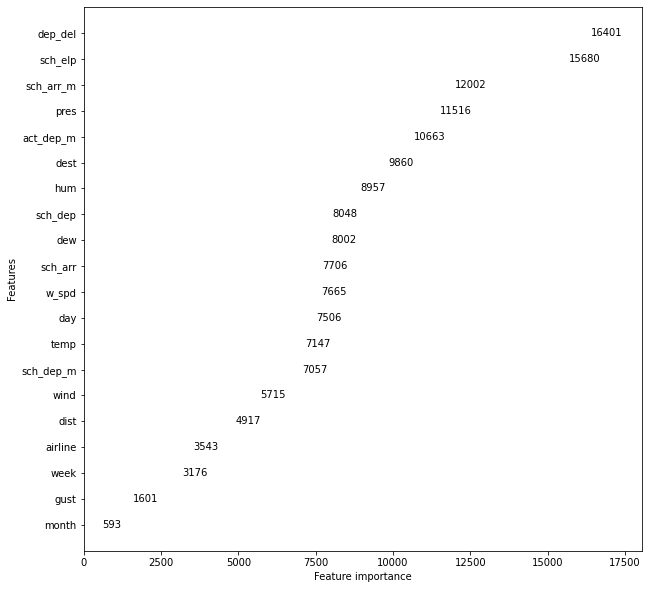

In [9]:
lgb.plot_importance(model1,grid=False, figsize=(10,10), title=None,height =0)

1.3036547900569588
4.562605033633755
defaultdict(<class 'collections.OrderedDict'>, {})


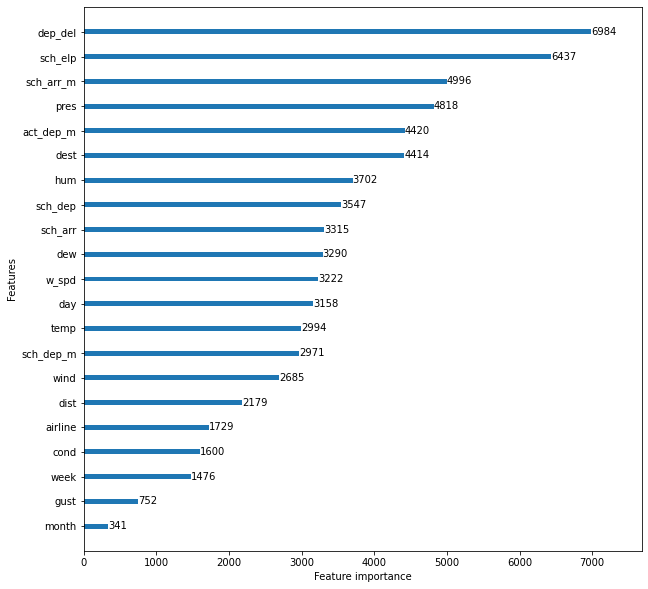

In [76]:
print(mean_absolute_error(reg5.predict(x3),y3))
print(mean_absolute_error(reg5.predict(x_test),y_test))
print(reg5.best_score_)
import lightgbm
lightgbm.plot_importance(reg5,grid=False, figsize=(10,10), title=None)
plt.show()

In [85]:
modeltest = reg5
pred=modeltest.predict(x_test)
y_test=[i[0] for i in y_test.values]
mse = np.sum(np.square(y_test - pred))
import math
print(mse)
print(mean_absolute_error(pred,y_test))

rmse = math.sqrt(mse/x_test.shape[0])
rse = math.sqrt(mse/(x_test.shape[0]-2))
print(rse,rmse)
from scipy import stats

stats.median_absolute_deviation(pred)

99243.04723234655
4.562605033633755
5.870212210825119 5.868175003680366


4.531902693442294

2.62
3.01
2.07
1.06
2.83
3.05
2.52
1.68
5.21
4.78
4.84
4.36


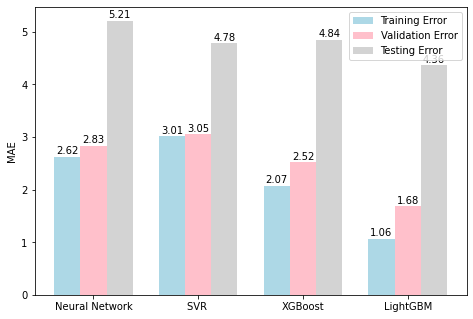

In [7]:
#PLOTS######
#categorical
from matplotlib import pyplot as plt
import numpy as np
x=[[2.62,3.01,2.07,1.06],[2.83,3.05,2.52,1.68],[5.21,4.78,4.84,4.36]] 

X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
r0=ax.bar(X + 0.25, x[0], color = 'lightblue', width = 0.25,label="Training Error")
r1=ax.bar(X + 0.5, x[1], color = 'pink', width = 0.25,label="Validation Error")
r2=ax.bar(X + 0.75, x[2], color = 'lightgrey', width = 0.25,label="Testing Error")

positions = (0.50, 1.50,2.50,3.50 )
labels = ("Neural Network", "SVR ", "XGBoost","LightGBM")
plt.xticks(positions, labels)
plt.ylabel("MAE")
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        print(np.round(height,2))
        ax.annotate('{}'.format(np.round(height,2)),
                    xy=(np.round(rect.get_x() + rect.get_width() / 2,2), np.round(height,2)),
                    xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(r0)
autolabel(r1)
autolabel(r2)
plt.legend()
plt.show()

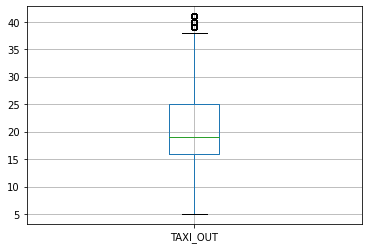

In [179]:
df.boxplot(column=["TAXI_OUT"])

In [3]:
from lightgbm import LGBMRegressor
import lightgbm as lgb
lgbm = LGBMRegressor()
model1 = lgb.Booster(model_file='taxi_light.txt')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

<function matplotlib.pyplot.show(*args, **kw)>

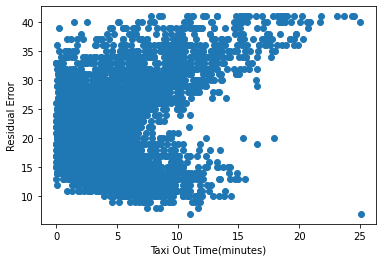

In [284]:
from matplotlib import pyplot as plt
err=abs(pred-y_test)
plt.scatter(err,y_test)
plt.ylabel("Residual Error")
plt.xlabel("Taxi Out Time(minutes)")
plt.show

In [5]:
model1.lower_bound()

-529.9360589117754

<AxesSubplot:>

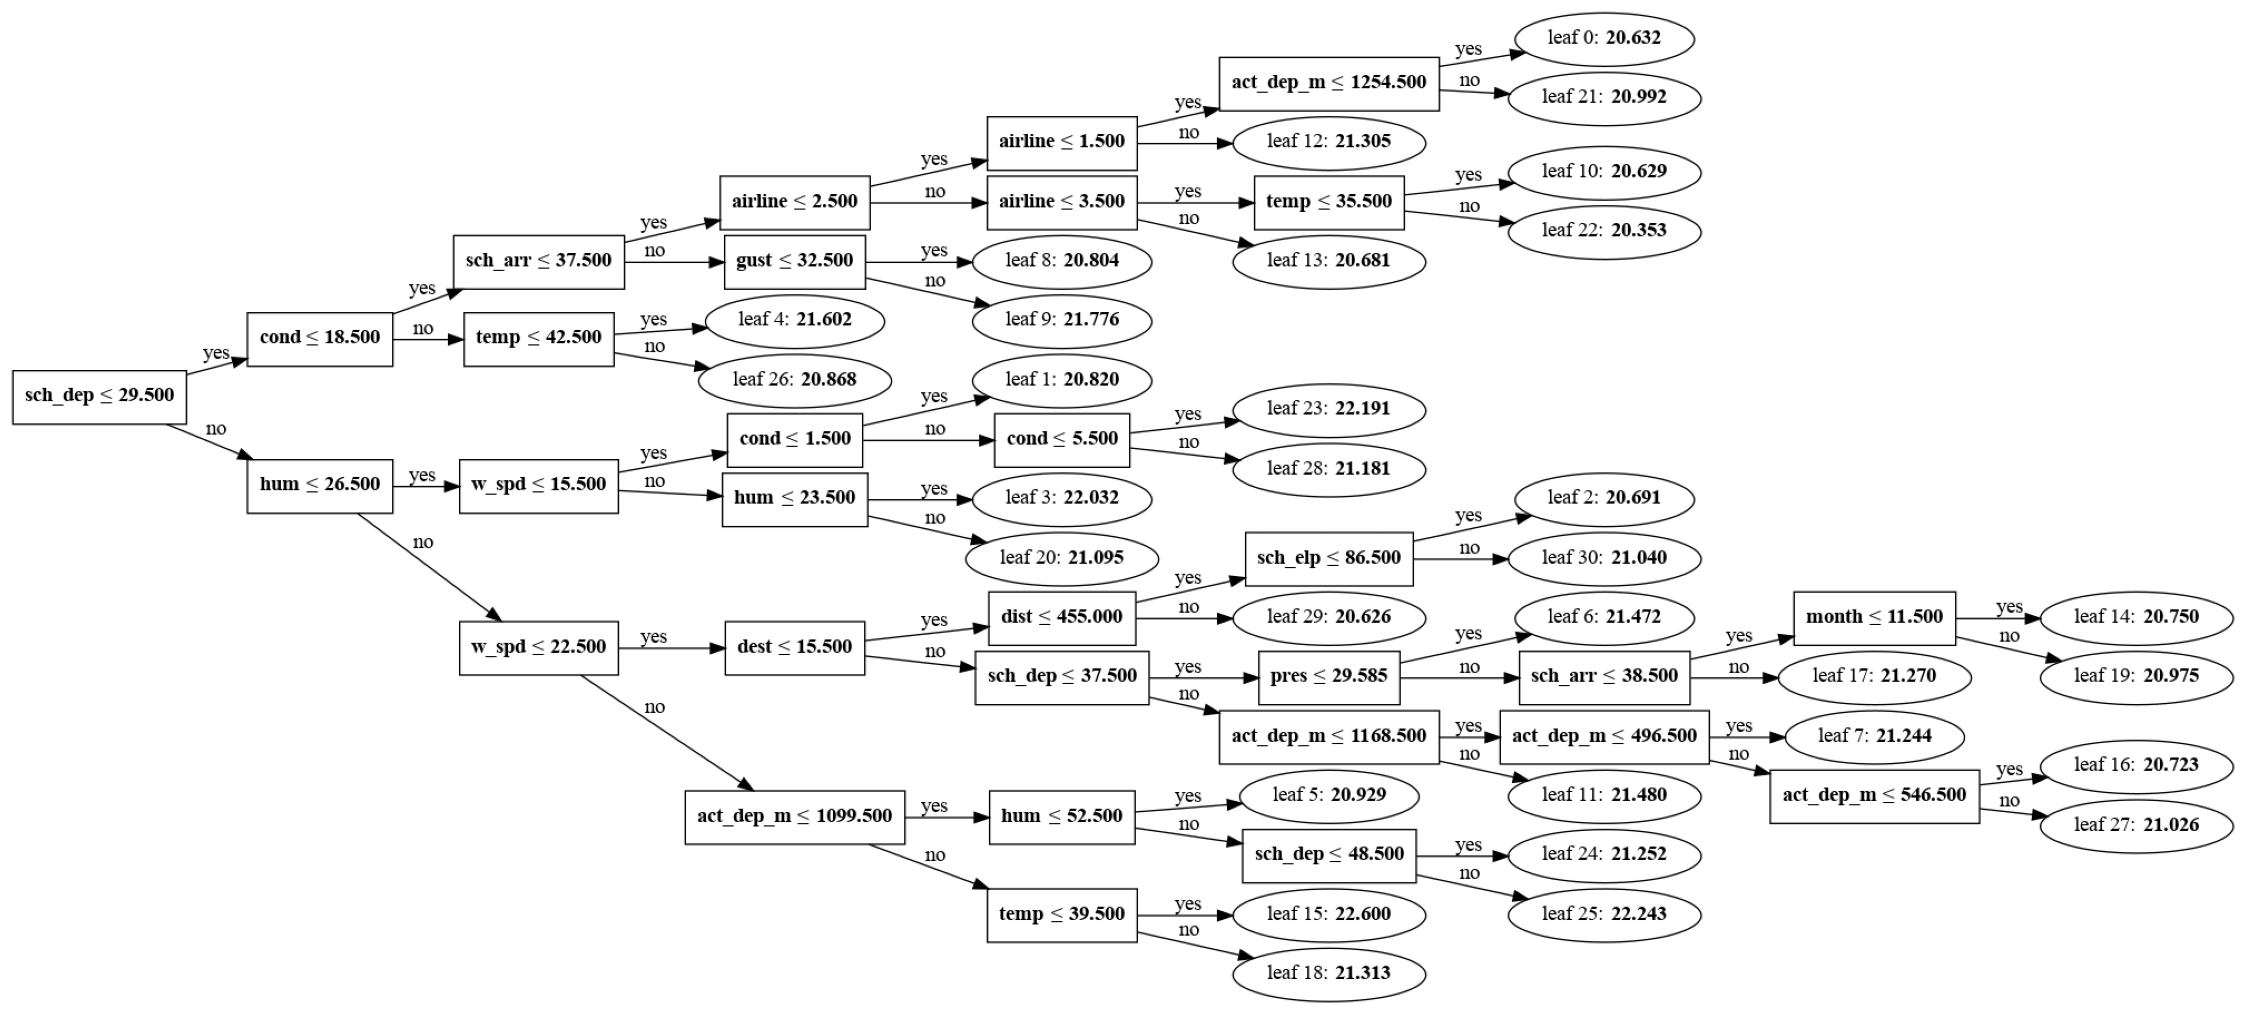

In [10]:
lgb.plot_tree(model1,figsize=(40,40))

<AxesSubplot:>

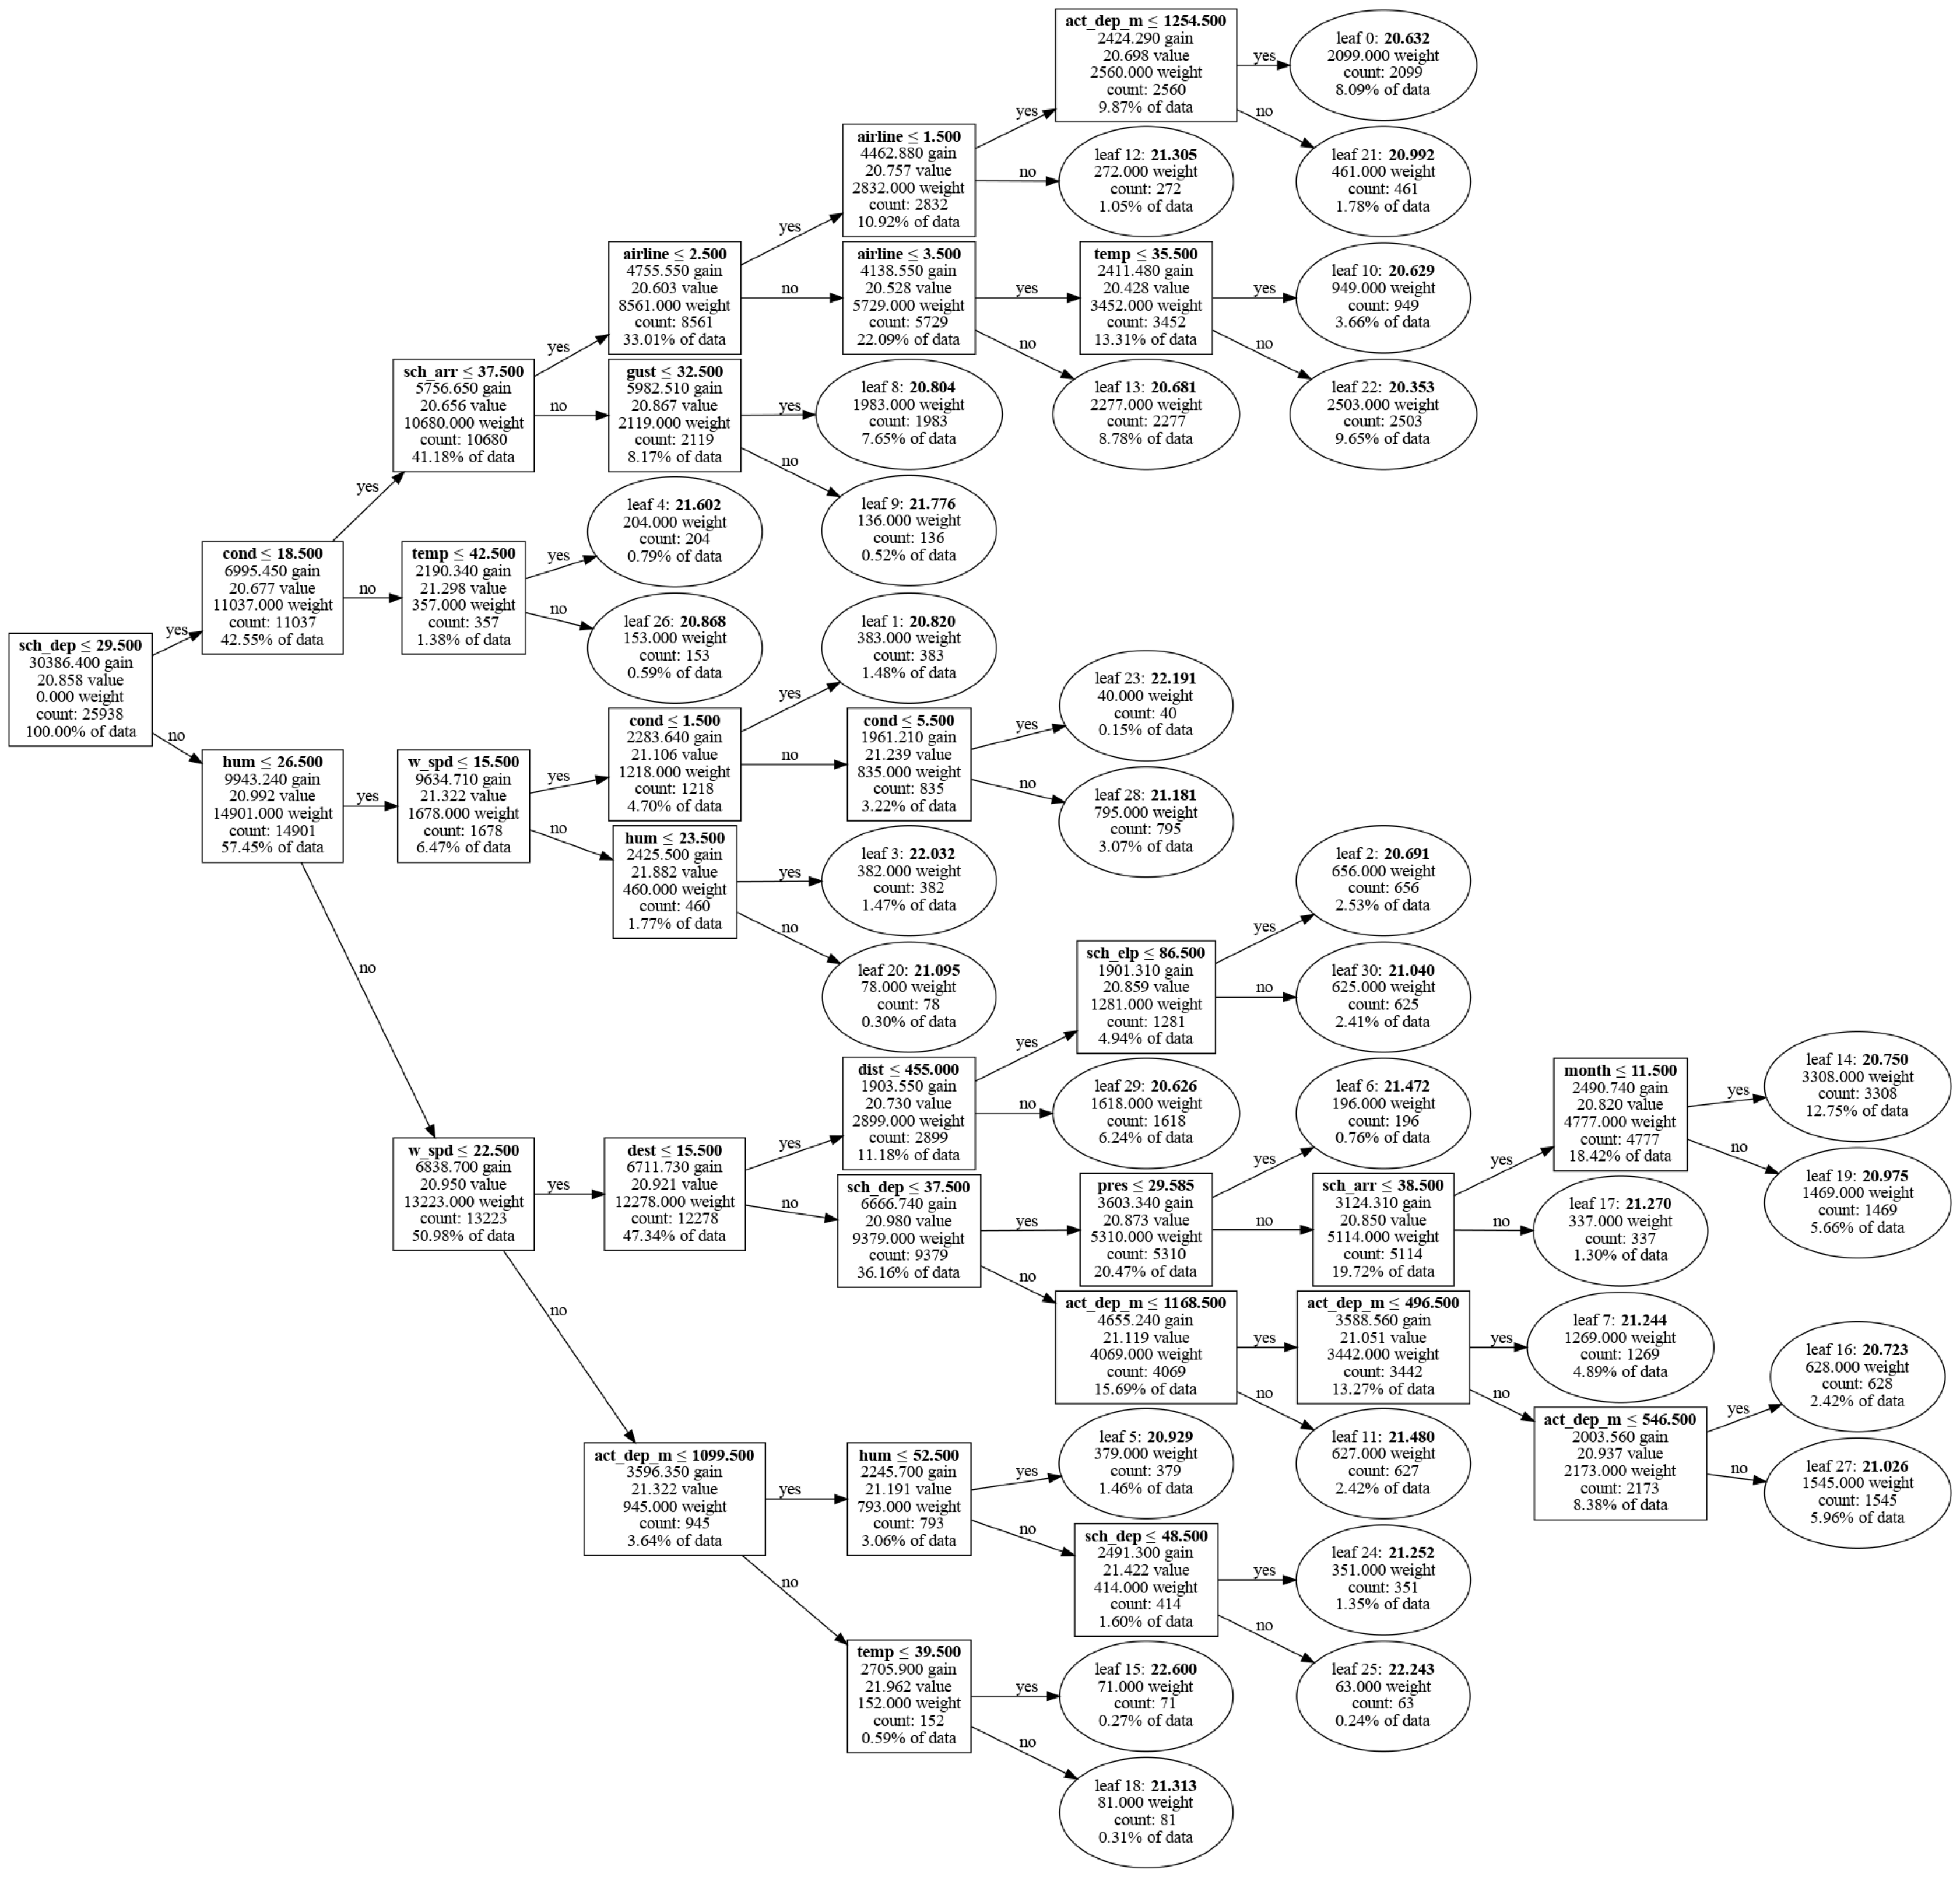

In [5]:
lgb.plot_tree(model1,tree_index=0,show_info=['split_gain','internal_value','internal_count','internal_weight','leaf_count','leaf_weight','data_percentage'],figsize=(60,60))

In [5]:
import shap

# print the JS visualization code to the notebook
shap.initjs()

In [7]:
modelt=model1

In [10]:
modelt.params['objective']='regression'
explainer = shap.TreeExplainer(modelt)

In [11]:
shap_values = explainer.shap_values(x3)

In [92]:
print(mean_absolute_error(modelt.predict(x_test),y_test))

4.562605033633755


In [93]:
shap.force_plot(explainer.expected_value, shap_values[:1,:], x3.iloc[:1,:])

In [94]:
print(shap_values.shape,shap_values[:1,:])
x3.iloc[:1,:]

(25938, 21) [[ 0.45048507  0.5964887   1.23670752  0.34920677  1.07950011  1.11129259
   1.43511857  0.38087338  0.1357744  -0.72815976  1.09381235  0.34248906
   0.49396702  0.18445657  0.15040518  0.4245373  -0.08140103  0.19203623
   0.09389197 -0.10189662  0.66352359]]


month  day  week  airline  dest  dep_del  sch_elp  dist  sch_dep_m  \
0     12    8     7        1    31       -1      192  1089        749   

   act_dep_m  ...  temp  dew  hum  wind  w_spd  gust   pres  cond  sch_dep  \
0        748  ...    40   25   55     9     14     0  30.48    16       23   

   sch_arr  
0       25  

[1 rows x 21 columns]

In [95]:
xtemp=x3.iloc[:1,:]
xtemp.loc[0,'dep_del']=10
explainer.shap_values(xtemp)
shap.force_plot(explainer.expected_value,explainer.shap_values(xtemp), xtemp)

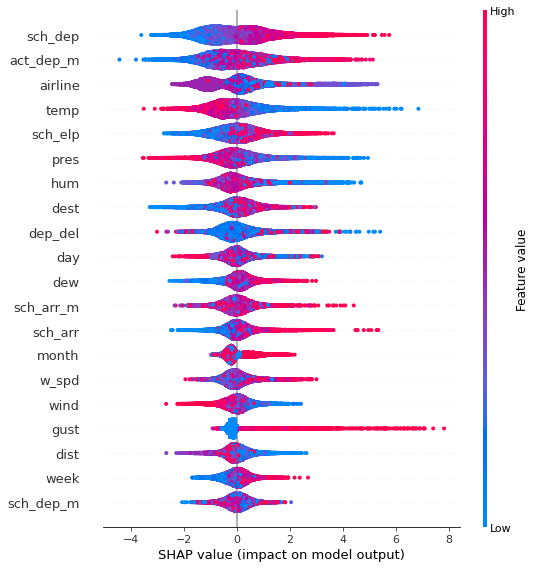

In [96]:
shap.summary_plot(shap_values, x3)

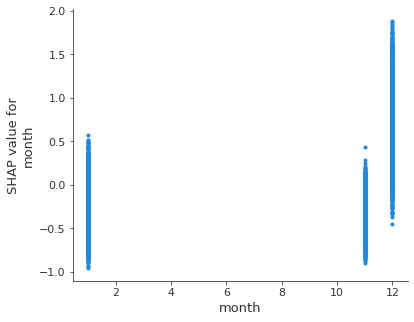

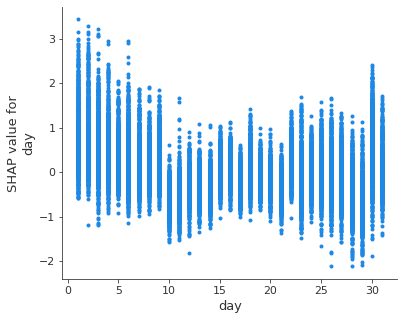

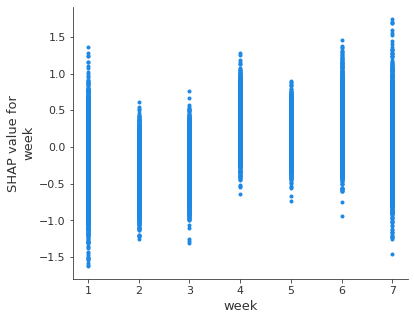

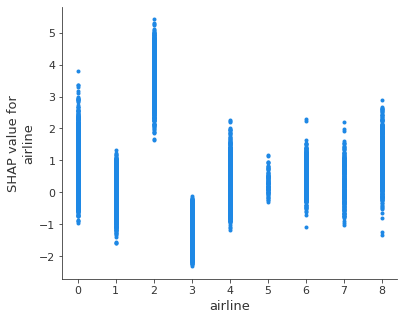

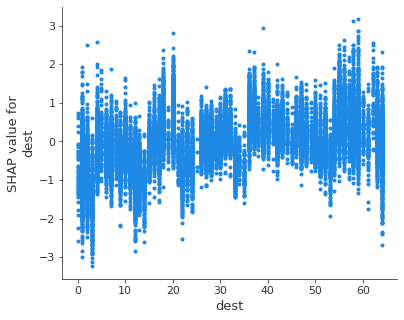

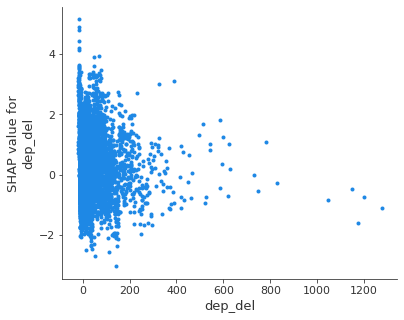

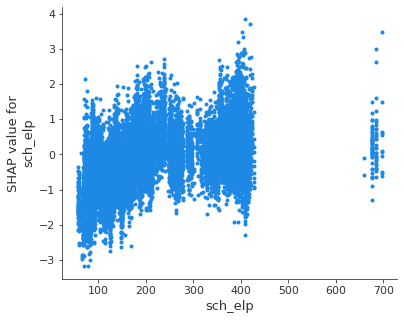

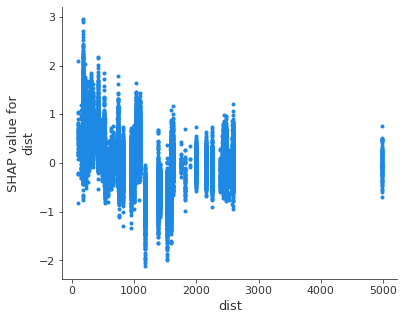

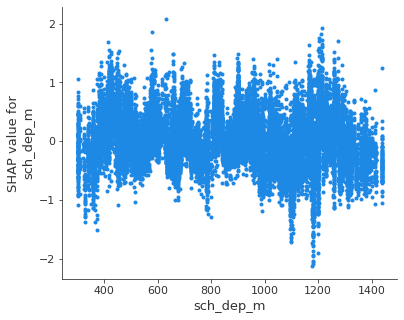

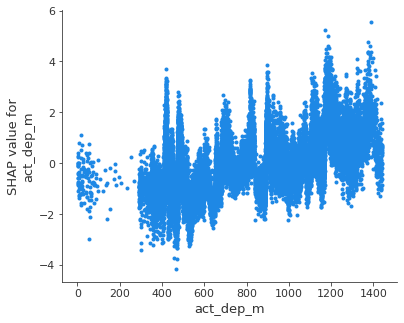

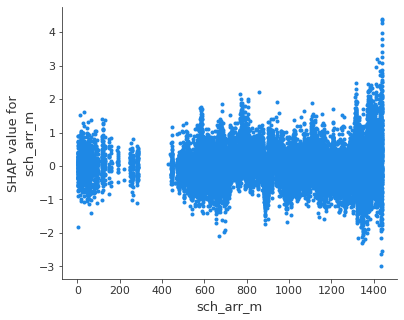

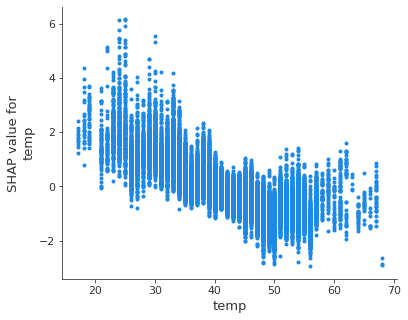

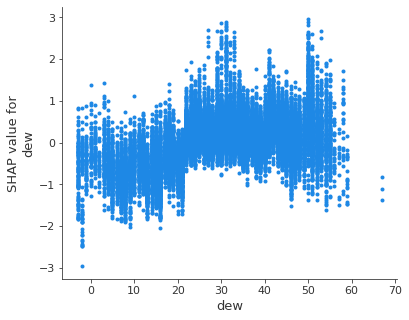

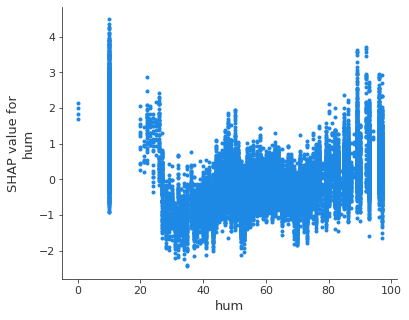

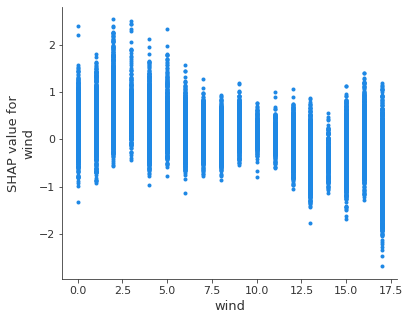

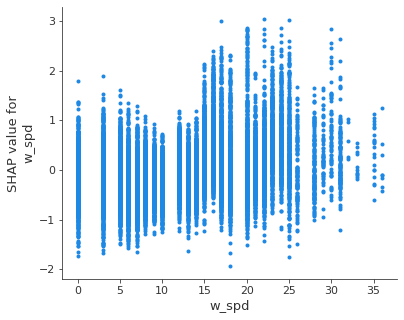

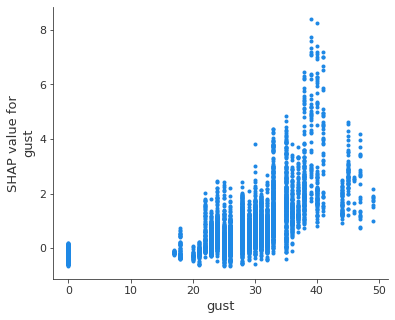

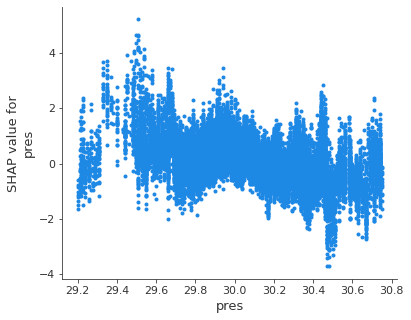

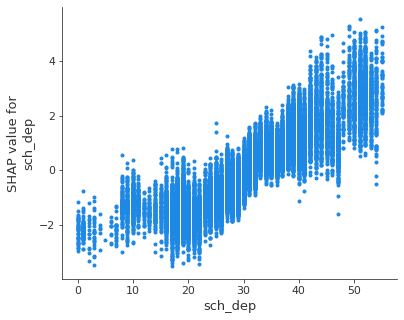

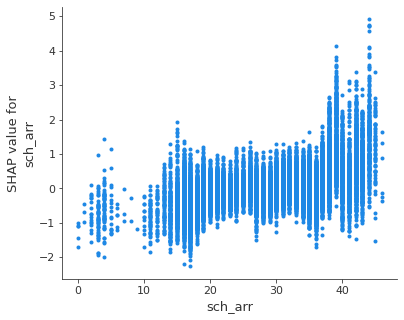

In [21]:
for i in range(0,len(x3.columns)):
    shap.dependence_plot(x3.columns[i], shap_values, x3, interaction_index=None)

In [13]:
x3.columns

Index(['month', 'day', 'week', 'airline', 'dest', 'dep_del', 'sch_elp', 'dist',
       'sch_dep_m', 'act_dep_m', 'sch_arr_m', 'temp', 'dew', 'hum', 'wind',
       'w_spd', 'gust', 'pres', 'cond', 'sch_dep', 'sch_arr'],
      dtype='object')